# Shallow Discourse Parsing 
## Penn Discourse TreeBank (PDTB) - Style Discourse Parsing

- __author__: Evgeny A. Stepanov
- __e-mail__: stepanov.evgeny.a@gmail.com

## PDTB Discourse Relations

- __lexically grounded__: Presence  of a discourse connective, or a possibility of its insertion

- __theory neutral__: No assumptions on higher-level discourse structure, just  'flat' discourse relations

- __binary relations__: take exactly 2 arguments
    - __Conn__: Discourse Connective (close classed)
    - __Arg1__
    - __Arg2__: syntactically attached to the connective
- __minimality principle__: Only required segments of text are annotated as arguments
    - __Sup1__: supplementary material for __Arg1__
    - __Sup2__: supplementary material for __Arg2__

### Discourse Relation Types

- __Explicit__: signaled by a discourse connective
- __Implicit__: not signaled by a discourse connective, but one could be inserted.
- __Alternative Lexicalizations (AltLex)__: not signaled by a discourse connective, and one could not be inserted.  

Other Relations:
- __Entity-based Coherence Relations (EntRel)__: two sentences involve the same entity.
- __No Relation (NoRel)__

#### Distribution of Relation Types in PDTB

| Relation Type |  count  |  %  |
|:--------------|--------:|----:|
| *Explicit*    |  18,459 | 45% |
| *Implicit*    |  16,224 | 40% |
| *AltLex*      |     624 |  1% |
| *EntRel*      |   5,210 | 13% |
| *NoRel*       |     254 |  1% |
| __Total__     |  40,600 |100% |


### Discourse Relation Senses

Hierarchical Relation Senses:

- 4 classes
- 16 types
- 23 subtypes

- Temporal
    - Asynchronous
    - Synchronous
        - Precedence
        - Succession


- Contingency
    - Cause
        - Reason
        - Result
    - *Pragmatic Cause*
        - Justification
    - Condition
        - Hypothetical
        - General
        - Unreal Present
        - Unreal Past
        - Factual Present
        - Factual Past
    - *Pragmatic Condition*
        - Relevance
    - Implicit Assertion

- Comparison
    - Contract
        - Juxtaposition
        - Opposition
    - *Pragmatic Contract*
    - Concession
        - Expectation
        - Contra-expectation
    - *Pragmatic Concession*


- Expansion
    - Conjunction
    - Instantiation
    - Restatement
        - Specification
        - Equivalence
        - Generalization
    - Alternative
        - Conjunctive
        - Disjunctive
        - Chosen alternative
    - Exception
    - List

#### CoNLL 2015 Flat Relations Senses

PDTB relations senses were organized into 15 flat relation senses for the shared task. (Mostly 2nd level of the hierarchy).

| CoNLL Senses    | PDTB Senses     |
|:----------------|:----------------|
| Temporal.Synchronous             ||
| Temporal.Asynchronous.Precedence ||
| Temporal.Asynchronous.Succession ||
| Contingency.Cause.Reason | + Contingency.Pragmatic Cause
| Contingency.Cause.Result ||
| Contingency.Condition    | + Contingency.Pragmatic Condition +
| Comparison.Contrast      | + Comparison.Pragmatic Contrast
| Comparison.Concession    | + Comparison.Pragmatic Concession
| Expansion.Conjunction    | + Expansion.List
| Expansion.Instantiation  ||
| Expansion.Restatement    || 
| Expansion.Alternative    | Expansion.Alternative.Conjunctive + Expansion.Alternative.Disjunctive
| Expansion.Alternative.Chosen Alternative ||
| Expansion.Exception      |
| EntRel                   ||

## Discourse Parsing Pipeline

### Minimal Pipeline

1. __Explicit__ Discourse Relations
    - Detect __Discourse Connective__
        - Discourse vs. Non-Discourse Usage Classification 
        - Extract Span of a Connective
    - Extract Argument Spans
        - Label Arguments (__Arg1__ & __Arg2__)
    - Assign sense to a relation
2. __Non-Explicit__ Relations
    - Generate Candidate Pairs (sentences that are not already in an explicit relation)
    - Extract Argument Spans (usually the 1st sentence is __Arg1__ and the 2nd is __Arg2__
    - Assign sense to a relation

### UNITN CoNLL 2015-2016 Pipleine

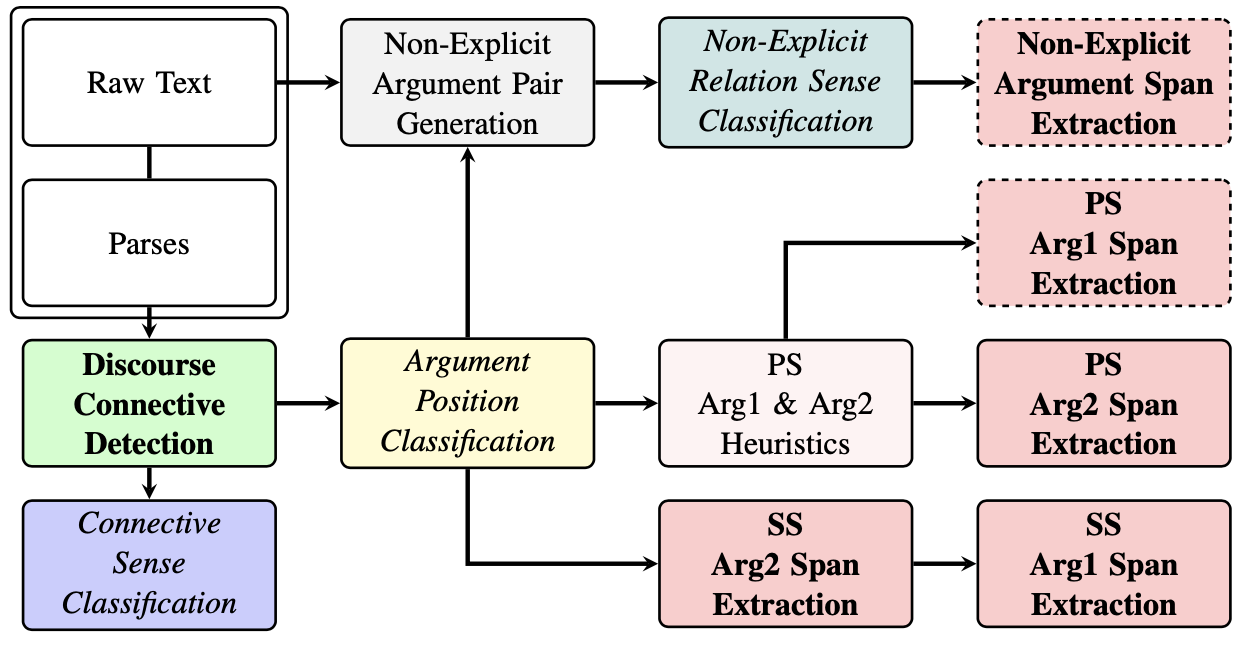

#### Approach 
- Token-level Sequence Labeling for
    - Discourse Connective Detection
    - Argument Span Extraction
- Argument Span Extraction models are conditioned on relations' being intra- or inter-sentential
    - Argument Position Classification

## Explicit Relation Parsing Tasks

### Discourse Connective Detection
- Token-level sequence labeling
- Dictionary-based approach
    - extract discourse connective candidates w.r.t. the dictionary

#### Discourse Connective Types
- Single Token
    - `and`, `but`, `or`, `otherwise`, ...
- Multiple Tokens
    - `as soon as`, `as the result`, `in other words`, ...
- Non-Contiguous
    - `on the one hand ... on the other hand ...`
    - `if ... then ...`
    - `either ... or ...`

#### Task Assessment
- __Complexity__: relatively easy.
- Using just cased ngram (1-3) features in the window $\pm 2$ has $F_1 > 0.85$
- POS-tag + IOB-chain: $F_1 = 0.94$ (on CoNLL dev set)

### Argument Position Classification

Argument Position Classification involves detection of the location of __Arg1__ with respect to __Arg2__: 
- same sentsence (`SS`) -- *intra-sentential* relations
- some previous sentence (`PS`) -- *inter-sentential* relations
- some following sentence (`FS`) -- *inter-sentential* relations (rare)


Distribution of discourse connectives in PDTB with respect to syntactic category (rows) and position in the sentence (columns) and the location of __Arg1__ as in the same sentence (`SS`) as the connective or the previous sentences (`PS`). The case when __Arg1__ appears in some following sentence (`FS`) is ignored, since it has only 8 instances. 

- `SI` -- sentence initial
- `SM` -- sentence medial

| Syntactic Category  | SI-SS          | SI-PS          | SM-SS          | SM-PS          |
|:--------------------|---------------:|---------------:|---------------:|---------------:|
| Coordinating        |    10  (0.05%) | 2,869 (15.54%) | 3,841 (20.81%) |    202 (1.09%) |
| Subordinating       | 1,402  (7.60%) |    114 (0.62%) | 5,465 (29.61%) |     83 (0.45%) |
| Discourse Adverbial |    13  (0.07%) |  1,632 (8.84%) |   495  (2.68%) | 2,325 (12.60%) |


- The overall accuracy of the `SS` vs. `PS` majority classification using just syntactic category and position information is already 95.0% (17,534/18,451)
- Even better when done per connective: e.g.: Sentence initial subordinating `so` always has __Arg1__ in `PS`


#### Task Assessment

- __Complexity__: very easy
- Baseline $\approx 0.95$
- Classification into Same Sentence (`SS`) and Previous Sentence (`PS`) __Arg1__
- Explicit discourse connectives have a strong preference on the positions of its arguments w.r.t. their position in a sentence
- POS tag + IOB chain: $F_1 = 0.99$


### Argument Span Extraction

For each discourse relation,  identify:
- __Arg1__ span
- __Arg2__ span

Optionally:
- __Sup1__ span
- __Sup2__ span

Could be conditioned on Argument Position Classification or not.

__Decision Levels__

| Level                 | Approach          | References |
|:----------------------|:------------------|:-----------|
| Token                 | Sequence Labeling | Ghosh et al. (2011, 2012), Stepanov et al. (2013, 2015, 2016)
| Syntactic Constituent | Classification    | Xu et al. (2012)
| Syntactic Tree Node   | Classification with syntactic tree subtraction | Lin et al. (2012)


#### Discourse Connectives & Arguments

No, it wasn't Black Monday.

But while the New York Stock Exchange didn't fall apart Friday as the Dow Jones Industrial Average plunged 190.58 points -- most of it in the final hour -- it barely managed to stay this side of chaos. 

- Relation 1:
    - __Conn__: `But`
        - __Sense__: `Comparison.Concession.Contra-Expectation`
    - __Arg1__: `No, it wasn't Black Monday.`
    - __Arg2__: `while the New York Stock Exchange didn't fall apart Friday as the Dow Jones Industrial Average plunged 190.58 points -- most of it in the final hour -- it barely managed to stay this side of chaos.`

- Relation 2:
    - __Conn__: `while`
        - __Sense__: `Comparison.Concession.Expectation`
    - __Arg1__: `But` ... `it barely managed to stay this side of chaos.`
    - __Arg2__: `the New York Stock Exchange didn't fall apart Friday`
    - __Sup2__: `as the Dow Jones Industrial Average plunged 190.58 points -- most of it in the final hour`

- Relation 3:
    - __Conn__: `as`
        - __Sense__: `Temporal.Synchronous`
    - __Arg1__: `while the New York Stock Exchange didn't fall apart Friday`
    - __Arg2__: `the Dow Jones Industrial Average plunged 190.58 points -- most of it in the final hour`

- In the example:
    - 2 sentences
    - 3 Discouse Connectives
    - 3 Explicit discourse relations
- Argument Spans are *overlapping*
- Require argument candidates per relation (i.e. per detected connective)
    - __Repeat the relevant document span__ for Argument Span Extraction

#### Task Assessment

- __Complexity__: varies (3-4 models per argument type conditioned on Argument Position Classification)
- Make use of Discourse Connective spans 
- Intra-sentential models are in a cascade (__Arg2__ - __Arg1__)
    - Since __Arg2__ is attached to connective it is easier
    - Could be done in a single step

### Connective Sense Classification (Explicit Relation Sense Classification)

#### Task Assessment

- __Complexity__: relatively easy
- 4-classes
    - tokens & POS-tags $F_1 > 0.94$
- 14 classes (15 CoNLL - `EntRel`) using just cased tokens
    - 2 step classification: $0.894$
    - "flat" classification: $0.897$

## Token-Level Syntactic Features

- Lexical Features
    - Token (cased)
    - __Connective Head__:  a binary feature (0 or 1) that indicates whether a token is in the list of 100 PDTB discourse connectives;
- Constituency Parse Tree Features
    - Part-Of-Speech Tag
    - __Chunk Tag__: the syntactic chunk prefixed with the information whether a token is at the beginning (B-), inside (I-) or outside (O) of the constituent (i.e. IOB format);
    - __IOB-Chain__: the path string of the syntactic tree nodes from the root node to the token, prefixed with the IOB information
- Dependency Parse Tree Features 
    - __Dependency Chain__: the path string of the functions of the parents of a token, starting from root of a dependency parse tree;

### Constituency Parse Tree Features

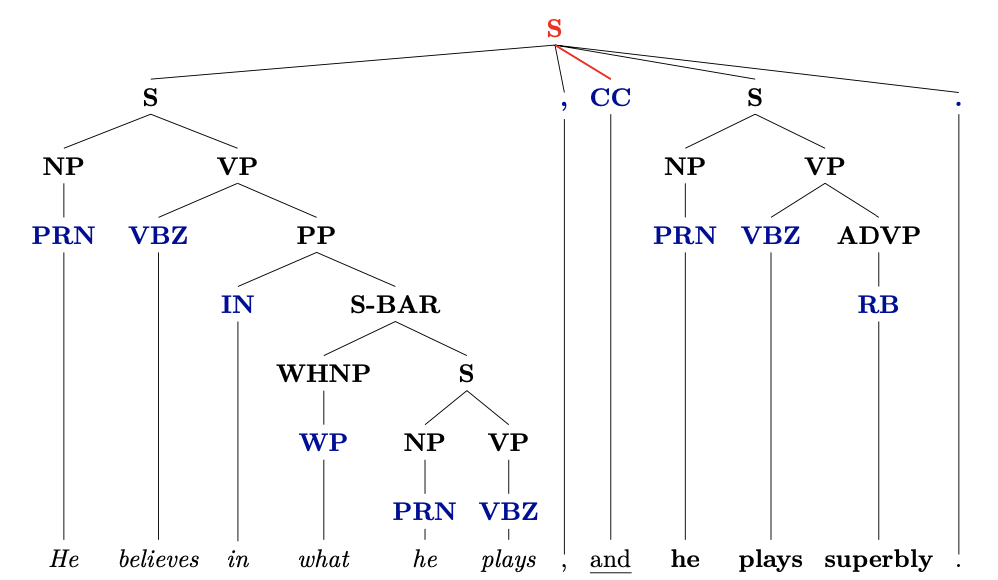

| Token     | POS-Tag | Chunk-Tag | IOB-Chain |
|:----------|:--------|:----------|:----------|
| *He*      | `PRN`   | `B-NP`    | `B-S/B-S/B-NP`
| *he*      | `PRN`   | `B-NP`    | `I-S/I-S/I-VP/I-PP/I-SBAR/B-S/B-NP`
| __he__    | `PRN`   | `B-NP`    | `I-S/B-S/B-NP`
| *plays*   | `VBZ`   | `B-VP`    | `I-S/I-S/I-VP/I-PP/I-SBAR/I-S/B-VP`
| __plays__ | `VBZ`   | `B-VP`    | `I-S/I-S/B-VP`
| `and`     | `CC`    | `O`       | `I-S`


### Dependency Parse Tree Features

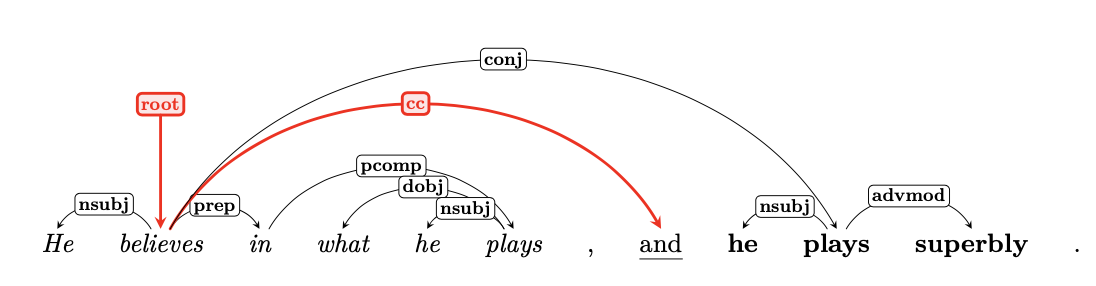

| Token     | Dep. Rel | Dep-Chain |
|:----------|:---------|:----------|
| *He*      | `nsubj`  | `root/nsubj`
| *he*      | `nsubj`  | `root/prep/pcomp/nsubj`
| __he__    | `nsubj`  | `root/conj/nsubj`
| *plays*   | `pcomp`  | `root/prep/pcomp`
| __plays__ | `conj`   | `root/conj/nsubj`
| `and`     | `cc`     | `root/cc`

### Baseline Discourse Connective Detection Model

- Conditional Random Fields
- Unigrams (token + POS-tag)

In [81]:
# to import conll
import os
import sys
sys.path.insert(0, os.path.abspath('../src/'))

from conll import evaluate, read_corpus_conll

In [82]:
trn = '../data/PDTB/pdtb.02-21.dcd.trn.conll'
dev = '../data/PDTB/pdtb.22.dcd.dev.conll'

In [97]:
def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [token[7] for token in sent]

In [100]:
def word2features(sent, i):
    word = sent[i][4]
    pos = sent[i][5]
    return {'bias': 1.0, 'word': word, 'pos': pos}

In [117]:
trn_data = read_corpus_conll(trn)
dev_data = read_corpus_conll(dev)

In [109]:
%%time
trn_feats = [sent2features(s) for s in trn_data]
trn_label = [sent2labels(s) for s in trn_data]

CPU times: user 624 ms, sys: 55.7 ms, total: 680 ms
Wall time: 679 ms


In [110]:
%%time
from sklearn_crfsuite import CRF

crf = CRF(
    algorithm='lbfgs', 
    c1=0.1, 
    c2=0.1, 
    max_iterations=100, 
    all_possible_transitions=True
)
crf.fit(trn_feats, trn_label)

CPU times: user 20.2 s, sys: 410 ms, total: 20.6 s
Wall time: 26.5 s


/opt/miniconda3/envs/unitn/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


CRF(algorithm='lbfgs', all_possible_transitions=True, c1=0.1, c2=0.1,
    keep_tempfiles=None, max_iterations=100)

In [111]:
# extract dev set features
dev_feats = [sent2features(s) for s in dev_data]
# predict labels
pred = crf.predict(dev_feats)

In [113]:
# create hypothesis file from predictions 
hyp = [[(dev_feats[i][j], t) for j, t in enumerate(tokens)] for i, tokens in enumerate(pred)]

In [116]:
# for nice tables
import pandas as pd

results = evaluate(dev_data, hyp)

pd_tbl = pd.DataFrame().from_dict(results, orient='index')
pd_tbl.round(decimals=3)

,p,r,f,s
conn,0.808,0.644,0.717,680
total,0.808,0.644,0.717,680


### Exercise: Discourse Connective Detection
- Train a CRF model to detect discourse connectives
- Add ngrams
- Make use of a dependency path (from assignment 1) as a feature
- Experiment with other token-level syntactic features (optional)
    - Use spacy

### Exercise: Connective Sense Classification [Optional]
- Train a connective sense classification model
- 4 class model
- 14 class model

## Non-Explicit Relation Parsing Tasks

### Non-Explicit Argument Pair Generation

- Generate candidate relation pairs w.r.t. Argument Position Classification decision: 
    - exclude all sentences involved in inter-sentential discourse relations
    - respect paragraph boundaries

### Non-Explicit Relation Detection

We could approach classification of implicit relation senses by first detecting if a sentence pair is a relation

#### Task Assessment
- __Complexity__: hard 
- 'flat' vs. hierarchical
    - Flat: Classify directly into Senses + No-Relation 
    - Hierarchical:
        1. Relation vs. No-Relation
        2. Implicit, EntRel, AltLex + No-Relation

### Non-Explicit Argument Span Extraction

- Usually covers whole sentence span
- Strip initial and final punctuation both for training and testing

### Non-Explicit Relation Sense Classification

#### Task Assessment
- __Complexity__: extremely hard
- Direct classification into 14 Senses + EntRel
- 2 step (easier according to some):
    - Prediction of a connective
    - Sense classification

#### Relation-level Features

1. Bag-of-Words;
2. Bag-of-Words prefixed with the argument ID (__Arg1__ or __Arg2__);
3. Cartesian product of all the tokens from both arguments;
4. Set of unique pairs from Cartesian product of Brown Clusters of all the tokens from both arguments (Rutherford and Xue, 2014);
5. First, last, and first 3 words of each argument (Pitler et al., 2009; Rutherford and Xue, 2014);
6. Predicate, subject (both passive and active), direct and indirect objects, extracted from dependency parses (8 features);
7. Ternary features for pairs from 6 to indicate matches (1, 0)  -- complementarily a feature to indicate, if one of the arguments misses the feature -- (extension of "similar subjects or main predicates" feature of (Rutherford and Xue, 2014)) (16 features);
8. Cartesian product of Brown Clusters of 6 (16 features);

## Evaluation

__Component-based Evaluation__
1. Connective
    - Span
2. Arg 1
    - Span & Label
3. Arg 2 
    - Span & Label
4. Arg 1 & 2: 2 + 3
    - Spans & Labels
5. __Parser__: error propagation from all previous steps
    - Connective
    - Arg 1
    - Arg 2
    - Sense

__Relation Type-based Evaluation__
1. Explicit Relations
2. Non-Explicit Relations
3. All Relations: 1 + 2

#### CoNLL 2016 UNITN Results on dev set (3rd)

| Relation Type    | Conn | Arg1 | Arg2 | Arg1&2 | Parser |
|:-----------------|-----:|-----:|-----:|-------:|-------:|
| __Explicit__     | 0.93 | 0.56 | 0.79 |   0.49 |   0.46 |
| __Non-Explicit__ |      | 0.70 | 0.75 |   0.59 |   0.21 |
| __ALL__          | 0.93 | 0.64 | 0.77 |   0.55 |   0.33 |



### Relation Sense Classification Baseline
- Majority Baseline (EntRel)
- Naive Bayes with arg-specific Bag-of-Words (similar to 2)


#### Preparing Data
 The data was preprocessed:
 - Partial senses: removed
 - Multi-label senses: take the first 
 - Arguments contain only proper spans

In [156]:
# load data (json)
import json
trn_rsc = json.load(open('../data/PDTB/pdtb.02-21.rsc.trn.json'))
dev_rsc = json.load(open('../data/PDTB/pdtb.22.rsc.dev.json'))

print(trn_rsc[0])

{'conn': 'however', 'arg1': 'In an Oct. 19 review of "The Misanthrope" at Chicago\'s Goodman Theatre ("Revitalized Classics Take the Stage in Windy City," Leisure & Arts), the role of Celimene, played by Kim Cattrall, was mistakenly attributed to Christina Haag', 'arg2': 'Ms. Haag plays Elianti', 'sense': 'Comparison.Contrast'}


In [157]:
# for tokenization
import spacy
nlp = spacy.load('en')

In [158]:
# dict of bows for classification
def prep_relation(dat):
    a1_doc = nlp(dat.get("arg1"))
    a1_feats = " ".join([t.text for t in a1_doc])
    a2_doc = nlp(dat.get("arg2"))
    a2_feats = " ".join([t.text for t in a2_doc])
    return ({"arg1": a1_feats, "arg2": a2_feats}, dat.get("sense"))

In [159]:
# preparing training set
trn_data = [prep_relation(x) for x in trn_rsc]
trn_feats = [x[0] for x in trn_data]
trn_sense = [x[1] for x in trn_data]

In [160]:
# preparing dev set
dev_data = [prep_relation(x) for x in dev_rsc]
dev_feats = [x[0] for x in dev_data]
dev_sense = [x[1] for x in dev_data]

In [161]:
print(trn_feats[0])
print(trn_sense[0])

{'arg1': 'In an Oct. 19 review of " The Misanthrope " at Chicago \'s Goodman Theatre ( " Revitalized Classics Take the Stage in Windy City , " Leisure & Arts ) , the role of Celimene , played by Kim Cattrall , was mistakenly attributed to Christina Haag', 'arg2': 'Ms. Haag plays Elianti'}
Comparison.Contrast


#### Label Encoding

In [162]:
from sklearn.preprocessing import LabelEncoder

lblencoder = LabelEncoder()
lblencoder.fit(trn_sense)
y_trn = lblencoder.transform(trn_sense)
y_dev = lblencoder.transform(dev_sense)

#### Vectorization

In [170]:
from sklearn.feature_extraction import DictVectorizer

dvectorizer = DictVectorizer(sparse=False)

x_trn = dvectorizer.fit_transform(trn_feats)
x_dev = dvectorizer.transform(dev_feats)

#### Classification

In [171]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

majority_c = DummyClassifier(strategy="most_frequent")

In [172]:
# majority baseline
majority_c.fit(x_trn, y_trn)
m_preds = majority_c.predict(x_dev)
print(classification_report(y_dev, m_preds, 
                            labels=list(range(len(lblencoder.classes_))),  # to display all senses 
                            target_names=lblencoder.classes_))

                                          precision    recall  f1-score   support

                   Comparison.Concession       0.00      0.00      0.00         5
                     Comparison.Contrast       0.00      0.00      0.00        82
                Contingency.Cause.Reason       0.00      0.00      0.00        73
                Contingency.Cause.Result       0.00      0.00      0.00        49
                   Contingency.Condition       0.00      0.00      0.00         0
                                  EntRel       0.29      1.00      0.46       215
                   Expansion.Alternative       0.00      0.00      0.00         0
Expansion.Alternative.Chosen alternative       0.00      0.00      0.00         2
                   Expansion.Conjunction       0.00      0.00      0.00       120
                     Expansion.Exception       0.00      0.00      0.00         0
                 Expansion.Instantiation       0.00      0.00      0.00        47
               

/opt/miniconda3/envs/unitn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/unitn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [173]:
# Naive Bayes Baseline
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(x_trn, y_trn)
n_preds = classifier.predict(x_dev)

print(classification_report(y_dev, n_preds, 
                            labels=list(range(len(lblencoder.classes_))),
                            target_names=lblencoder.classes_))

                                          precision    recall  f1-score   support

                   Comparison.Concession       0.00      0.00      0.00         5
                     Comparison.Contrast       0.00      0.00      0.00        82
                Contingency.Cause.Reason       0.50      0.01      0.03        73
                Contingency.Cause.Result       0.00      0.00      0.00        49
                   Contingency.Condition       0.00      0.00      0.00         0
                                  EntRel       0.30      1.00      0.46       215
                   Expansion.Alternative       0.00      0.00      0.00         0
Expansion.Alternative.Chosen alternative       0.00      0.00      0.00         2
                   Expansion.Conjunction       0.00      0.00      0.00       120
                     Expansion.Exception       0.00      0.00      0.00         0
                 Expansion.Instantiation       0.00      0.00      0.00        47
               

/opt/miniconda3/envs/unitn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/miniconda3/envs/unitn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Exercise: Non-Explicit Relation Sense Classification
- Define functions to extract relation level features
- Dependency-based features (6, 7, 8)
    - Train & evaluate the model
- Embedding concatenation of both arguments
    - Train & evaluate the model
- Try different argument embedding methods [optional]
    - [Schenk et al. (2016)](https://www.aclweb.org/anthology/K16-2005.pdf)
- Compare model performances